# 逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [17]:
datafile = 'data\ex2data1.txt'
data_matrix = np.loadtxt(datafile, delimiter=',')
X = np.array(data_matrix[:,:2])
y = np.array(data_matrix[:,2:])
X = np.insert(X, 0, 1, axis = 1)
m = y.size

### Sigmoid函数

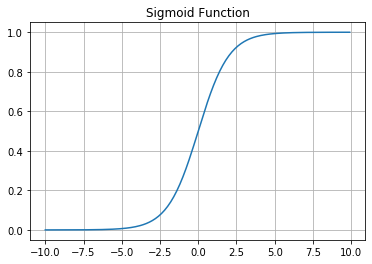

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

xx=np.arange(-10,10,.1)
plt.plot(xx,sigmoid(xx))
plt.title('Sigmoid Function')
plt.grid(True)

### 绘制训练集数据视图

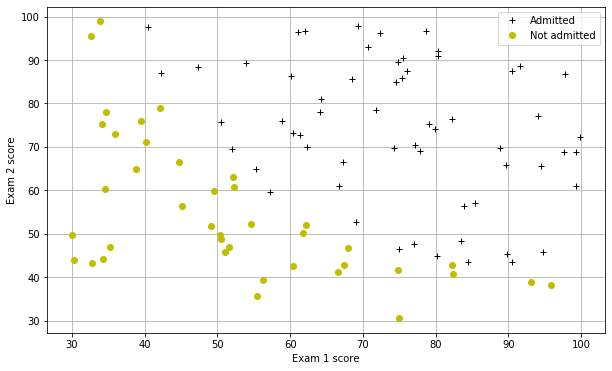

In [18]:
pos=np.array([i[:2] for i in data_matrix if i[2]]         #正例
neg=np.array([i[:2] for i in data_matrix if not i[2]])    #反例

def plot_data():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1],'k+',label='Admitted')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Not admitted')
    plt.ylabel('Exam 2 score')
    plt.xlabel('Exam 1 score')
    plt.legend()
    plt.grid(True)
    
plot_data()

### 代价函数及求最优解函数

In [19]:
# 假设函数
def h(theta,X):
    return 1./(1+np.exp(-np.dot(X,theta)))

# 代价函数
def cost(theta,X,y):
    return float(1./m*(np.dot(-y.T,np.log(h(theta,X)))-np.dot((1-y).T,np.log(1-h(theta,X)))))

In [20]:
theta_test=np.zeros((X.shape[1],1))
cost(theta_test,X,y)

0.6931471805599452

In [21]:
# 使用fmin函数直接求得代价函数的最优解
def opt(theta,X,y):
    result=optimize.fmin(cost,x0=theta,args=(X,y),maxiter=400, full_output=True)
    return result[0],result[1]

In [22]:
theta, min_cost=opt(theta_test,X,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [23]:
theta.resize(3,1)
cost(theta,X,y)

0.2034977015902151

### 绘制决策边界

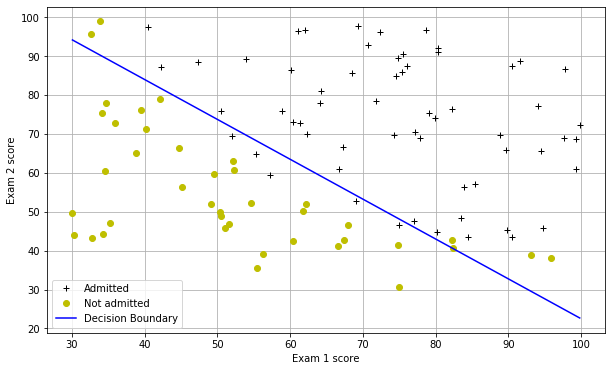

In [10]:
pos=np.array([i[:2] for i in data_matrix if i[2]])
neg=np.array([i[:2] for i in data_matrix if not i[2]])

x=np.array([np.min(X[:,1]), np.max(X[:,1])])
y=(-1./theta[2])*(theta[0] + theta[1]*x)

plot_data()
plt.plot(x,y,'b-',label='Decision Boundary')
plt.legend()